In [13]:
import numpy as np
import spectral_embedding as se
import matplotlib as mpl
import matplotlib.pyplot as plt

In this example we compute the asymptotic distributions for points with the adjacency spectral embedding for both the mixed membership and degree-corrected stochastic block models. Unlike the stochastic block model, there are infinitely many latent positions in their generalised random dot product model, where we may wish to known the asymptotic distribution.

In [14]:
np.random.seed(42)

For the mixed membership stochastic block model, each node is assigned a probability distribution over three communities, which we assume is drawn independently from a Dirichlet distribution $\pi_i {\sim} \textrm{Dirichlet}(\alpha)$. Then, for each pair of nodes $i$ and $j$, we sample the communities that each node plays in that possible connection, $\mathbf{Z}_{i \to j} \sim \pi_i$ and $\mathbf{Z}_{j \to i} \sim \pi_j$. Then, for $i < j$,
$$
	\mathbf{A}_{ij} \mid \mathbf{Z}_i, \mathbf{Z}_j  \stackrel{\mathrm{ind}}{\sim} \textrm{Bernoulli}( \mathbf{B}_{\mathbf{Z}_{i \to j}, \mathbf{Z}_{j \to i}}).
$$
In thie example, we assign $\alpha = (0.25, 0.25, 0.25)$.

In [15]:
K = 3
n = 1000
alpha = np.repeat(0.25, K)
B = se.generate_B(K, rho=0.2)
print(np.round(B,3))

[[0.075 0.12  0.012]
 [0.12  0.031 0.173]
 [0.012 0.173 0.12 ]]


Compute the adjacency spectral embedding using embedding dimension $d = 3$ equal to the number of communities.

In [16]:
A_MMSBM, Z_MMSBM = se.generate_MMSBM(n, B, alpha)
XA_MMSBM = se.ASE(A_MMSBM, K)

Plot the embedding using the two leading dimensions for visualisation. Points are coloured based on their probability distribution $\pi_i$ as a mixture of red, blue and green. The embedding forms a noisy triangle with points near the corners having most of their probability mass assigned to a single community as shown by the colouring.

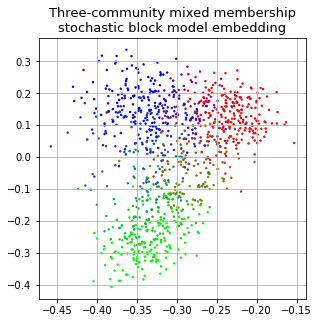

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(4.8,4.8))

ax.grid()
ax.scatter(XA_MMSBM[:,0], XA_MMSBM[:,1], marker='.', s=8, c=Z_MMSBM)
ax.set_title('Three-community mixed membership\nstochastic block model embedding', fontsize=13);

Find the asymptotic mean and covariance for the three corners of the simplex representing how a node would be embedding if it was had all its probability mass assigned to a single community.

In [18]:
zs = np.array([[1.0,0.0,0.0], [0.0,1.0,0.0], [0.0,0.0,1.0]])
X_MMSBM, SigmaX_MMSBM = se.MMSBM_distbn(A_MMSBM, B, Z_MMSBM, alpha, K, zs)

We plot the same diagram including the theoretical simplex and ellipses showing a 95% confident interval showing the shape of the asymptotic Gaussian distributions.

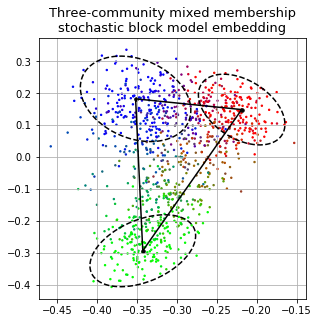

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(4.8,4.8))

ax.grid()
ax.scatter(XA_MMSBM[:,0], XA_MMSBM[:,1], marker='.', s=8, c=Z_MMSBM)

for i in range(K):
    for j in range(i+1, K):
        ax.plot([X_MMSBM[i,0], X_MMSBM[j,0]], [X_MMSBM[i,1], X_MMSBM[j,1]], c='black')

for t in range(len(zs)):
    ax.scatter(X_MMSBM[t,0], X_MMSBM[t,1], marker='o', s=12, c='black')
    ellipse = se.gaussian_ellipse(X_MMSBM[t], SigmaX_MMSBM[t][0:2,0:2]/n)
    ax.plot(ellipse[0], ellipse[1],'--', color='black')
    
ax.set_title('Three-community mixed membership\nstochastic block model embedding', fontsize=13);

In [68]:
np.random.seed(16)

For the degree-corrected stochastic block model, each node is assigned a community $\mathbf{Z}_i \in {0,1}$ with probability distribution $\pi$ like in the stochastic block model, but also a node-specific weight parameter $w_i \stackrel{\mathrm{ind}}{\sim} \textrm{Beta}(2,2)$. Then, for $i < j$,
$$
	\mathbf{A}_{ij} \mid \mathbf{Z}_i, \mathbf{Z}_j  \stackrel{\mathrm{ind}}{\sim} \textrm{Bernoulli}(w_i w_j \mathbf{B}_{\mathbf{Z}_i, \mathbf{Z}_j}).
$$
we assign $\pi = (0.5, 0.5)$ as in the stochastic block model.

In [69]:
K = 2
n = 1000
pi = np.repeat(1/K, K)
a = 2
b = 2
B = se.generate_B(K, rho=0.2)
print(np.round(B,3))

[[0.045 0.11 ]
 [0.11  0.009]]


Compute the adjacency spectral embedding using embedding dimension $d = 3$ equal to the number of communities.

In [70]:
A_DCSBM, Z_DCSBM, W_DCSBM = se.generate_DCSBM(n, B, pi, a, b)
XA_DCSBM = se.ASE(A_DCSBM, K)
col_DCSBM = [[(1.0,0.0,0.0),(0.0,0.0,1.0)][z] for z in Z_DCSBM]

Plot the embedding using where points are coloured based on their community assignment. The embedding forms two rays of points starting at the origin. The node-specific weight parameter $w_i$ dictates how far along a ray the point lies.

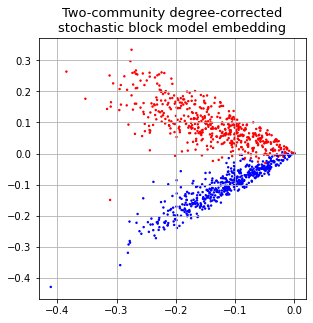

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(4.8,4.8))

ax.grid()
ax.scatter(XA_DCSBM[:,0], XA_DCSBM[:,1], marker='.', s=8, c=col_DCSBM)

ax.set_title('Two-community degree-corrected\nstochastic block model embedding', fontsize=13);

Find the asymptotic mean and covariance for the two endpoints of the rays and the two midpoints correpsonding to $w_i = 1$ and $w_i = 0.5$ respectively.

In [72]:
ws = np.array([1.0, 0.5])
X_DCSBM, SigmaX_DCSBM = se.DCSBM_distbn(A_DCSBM, B, Z_DCSBM, pi, K, ws, a, b)

We plot the same diagram including the theoretical rays for the latent positions and ellipses showing a 95% confident interval showing the shape of the asymptotic Gaussian distributions.

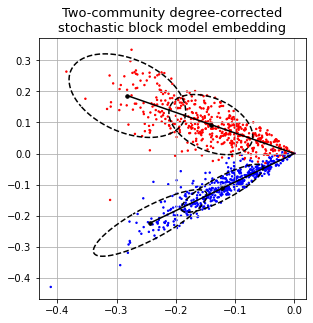

In [73]:
fig, ax = plt.subplots(1, 1, figsize=(4.8,4.8))

ax.grid()
ax.scatter(XA_DCSBM[:,0], XA_DCSBM[:,1], marker='.', s=8, c=col_DCSBM)

for i in range(K):
    ax.plot([X_DCSBM[0,i,0], 0], [X_DCSBM[0,i,1], 0], c='black')

for t in range(len(ws)):
    ax.scatter(X_DCSBM[t,:,0], X_DCSBM[t,:,1], marker='o', s=12, c='black')
    for i in range(K):
        ellipse = se.gaussian_ellipse(X_DCSBM[t,i], SigmaX_DCSBM[t,i][0:2,0:2]/n)
        ax.plot(ellipse[0], ellipse[1],'--', color='black')

ax.set_title('Two-community degree-corrected\nstochastic block model embedding', fontsize=13);